In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
# Store filepath in a variable
file_one = Path("ess_jb.csv")

In [3]:
ess_df = pd.read_csv(file_one)


In [4]:
non_null_counts = ess_df.count() 
non_null_counts

name        74078
essround    74078
edition     74078
proddate    74078
idno        74078
cntry       74078
dweight     74078
pspwght     74078
pweight     74078
anweight    58908
prob        13260
stratum     13260
psu         13260
stfdem      74078
stfeco      74078
stfedu      74078
stfgov      74078
stfhlth     74078
stflife     74078
trstep      74078
trstlgl     74078
trstplc     74078
trstplt     74078
trstprl     74078
imbgeco     74078
dscrgrp     74078
sclmeet     74078
mbtru       74078
iplylfr     73285
ipudrst     73285
dtype: int64

In [7]:
non_null_counts = ess_df.count() 

columns_to_keep = non_null_counts >= 60000


filtered_df = ess_df.loc[:, columns_to_keep]
filtered_df

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,stfdem,...,trstlgl,trstplc,trstplt,trstprl,imbgeco,dscrgrp,sclmeet,mbtru,iplylfr,ipudrst
0,ESS1e06_7,1,6.7,23.11.2023,1,CH,0.514000,0.514995,0.296298,6,...,4,8,5,6,9,2,6,3,1.0,2.0
1,ESS1e06_7,1,6.7,23.11.2023,2,CH,0.514000,0.413239,0.296298,8,...,8,7,6,7,8,2,7,2,1.0,3.0
2,ESS1e06_7,1,6.7,23.11.2023,7,CH,0.514000,0.480271,0.296298,7,...,4,4,6,3,8,2,6,3,2.0,4.0
3,ESS1e06_7,1,6.7,23.11.2023,10,CH,1.028000,1.046428,0.296298,5,...,7,6,6,7,6,2,7,3,1.0,2.0
4,ESS1e06_7,1,6.7,23.11.2023,14,CH,2.055900,1.920992,0.296298,7,...,4,8,3,6,5,2,7,1,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74073,ESS10e03_2,10,3.2,02.11.2023,27903,HU,1.226848,1.302095,0.449624,9,...,7,7,1,6,88,2,6,3,4.0,4.0
74074,ESS10e03_2,10,3.2,02.11.2023,27905,HU,0.778477,1.274237,0.449624,0,...,2,4,0,2,3,2,3,3,2.0,2.0
74075,ESS10e03_2,10,3.2,02.11.2023,27914,HU,1.259867,1.396051,0.449624,1,...,6,7,5,6,4,2,3,3,1.0,2.0
74076,ESS10e03_2,10,3.2,02.11.2023,27921,HU,0.778477,0.751644,0.449624,1,...,1,3,3,0,5,2,2,2,1.0,2.0


In [8]:
values_to_check = [77, 88, 99,  777, 888, 999, 7777, 8887, 9999]

condition = filtered_df.isin(values_to_check)

rows_to_drop = condition.any(axis=1)


cleaned_once_df = filtered_df [~rows_to_drop]


cleaned_once_df.columns

Index(['name', 'essround', 'edition', 'proddate', 'idno', 'cntry', 'dweight',
       'pspwght', 'pweight', 'stfdem', 'stfeco', 'stfedu', 'stfgov', 'stfhlth',
       'stflife', 'trstep', 'trstlgl', 'trstplc', 'trstplt', 'trstprl',
       'imbgeco', 'dscrgrp', 'sclmeet', 'mbtru', 'iplylfr', 'ipudrst'],
      dtype='object')

In [11]:

columns_one = ['ipudrst', 'iplylfr']
columns_two = ['sclmeet']
columns_three = ['mbtru', 'dscrgrp']
columns_four = ['stfgov', 'stflife', 'stfdem' , 'trstlgl' ,'trstprl', 'imbgeco', 'trstplt']

condition_one = (cleaned_once_df[columns_one] > 6).any(axis=1)
condition_two = (cleaned_once_df[columns_two] > 7).any(axis=1)
condition_three = (cleaned_once_df[columns_three] > 4).any(axis=1)
condition_four = (cleaned_once_df[columns_four] > 10).any(axis=1)

combined_condition = condition_one | condition_two | condition_three | condition_four 

cleaned_twice_df = cleaned_once_df[~combined_condition]

cleaned_twice_df

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,stfdem,...,trstlgl,trstplc,trstplt,trstprl,imbgeco,dscrgrp,sclmeet,mbtru,iplylfr,ipudrst
0,ESS1e06_7,1,6.7,23.11.2023,1,CH,0.514000,0.514995,0.296298,6,...,4,8,5,6,9,2,6,3,1.0,2.0
1,ESS1e06_7,1,6.7,23.11.2023,2,CH,0.514000,0.413239,0.296298,8,...,8,7,6,7,8,2,7,2,1.0,3.0
2,ESS1e06_7,1,6.7,23.11.2023,7,CH,0.514000,0.480271,0.296298,7,...,4,4,6,3,8,2,6,3,2.0,4.0
3,ESS1e06_7,1,6.7,23.11.2023,10,CH,1.028000,1.046428,0.296298,5,...,7,6,6,7,6,2,7,3,1.0,2.0
4,ESS1e06_7,1,6.7,23.11.2023,14,CH,2.055900,1.920992,0.296298,7,...,4,8,3,6,5,2,7,1,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74071,ESS10e03_2,10,3.2,02.11.2023,27897,HU,1.214404,0.672999,0.449624,4,...,5,5,0,2,2,2,4,2,2.0,2.0
74072,ESS10e03_2,10,3.2,02.11.2023,27901,HU,0.770348,1.245779,0.449624,9,...,10,10,10,10,3,2,4,2,1.0,2.0
74074,ESS10e03_2,10,3.2,02.11.2023,27905,HU,0.778477,1.274237,0.449624,0,...,2,4,0,2,3,2,3,3,2.0,2.0
74076,ESS10e03_2,10,3.2,02.11.2023,27921,HU,0.778477,0.751644,0.449624,1,...,1,3,3,0,5,2,2,2,1.0,2.0


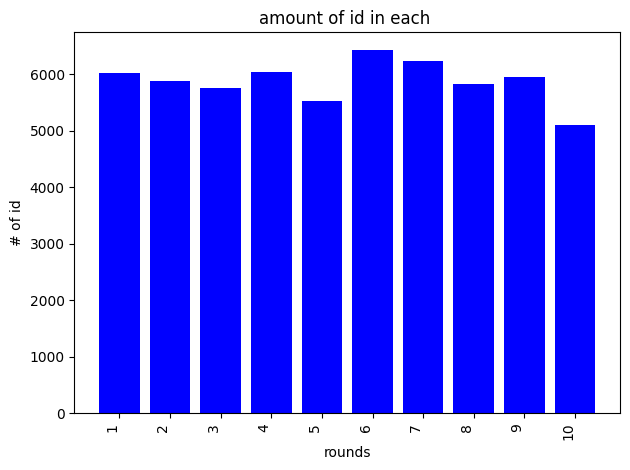

In [12]:

plt.figure()  
ess_round_bar = cleaned_twice_df.groupby("essround").size()

ess_round_bar_x = np.arange(len(ess_round_bar))

plt.bar(ess_round_bar_x, ess_round_bar, color="b", align="center")
plt.xticks(ess_round_bar_x, ess_round_bar.index, rotation=90, ha="right")
plt.xlabel("rounds")
plt.ylabel("# of id")
plt.title("amount of id in each ")
plt.tight_layout()  


In [13]:
value_mapping = {1: 0, 2: 0, 3: 1}

cleaned_twice_df['union membership'] = cleaned_twice_df['mbtru'].map(value_mapping)
mbtru_pie_name = cleaned_twice_df.groupby('union membership')
mbtru_pie_count = mbtru_pie_name['union membership'].count()


C:\Users\AndBe\AppData\Local\Temp\ipykernel_15000\2603209427.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_twice_df['union membership'] = cleaned_twice_df['mbtru'].map(value_mapping)


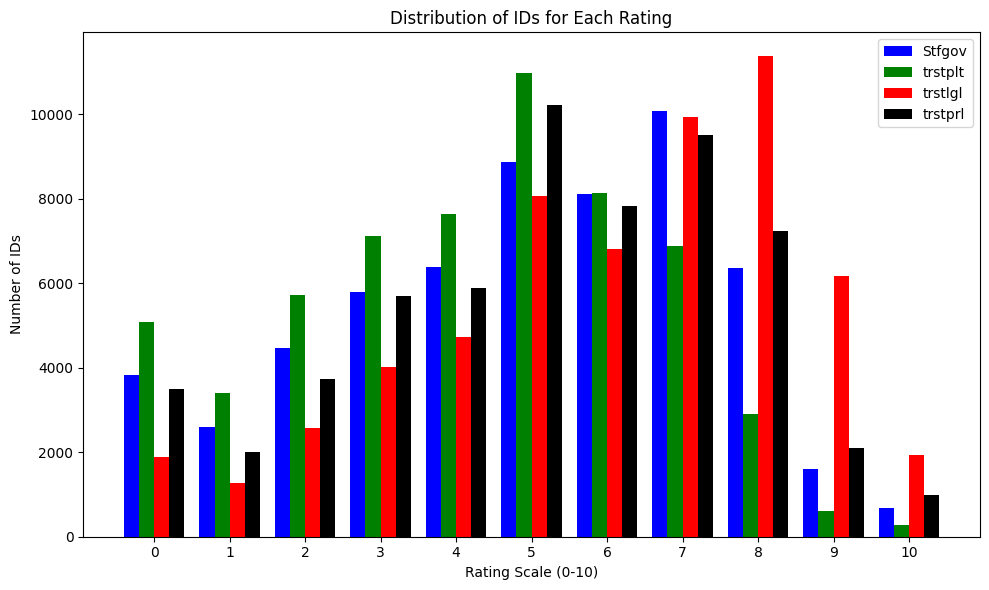

In [14]:

plt.figure(figsize=(10, 6))

bar_width = 0.2

indices = np.arange(11)  # Since the values range from 0 to 10

stfgov_bar = cleaned_twice_df.groupby("stfgov").size().reindex(indices, fill_value=0)
stflife_bar = cleaned_twice_df.groupby("trstplt").size().reindex(indices, fill_value=0)
trstlgl_bar = cleaned_twice_df.groupby("trstlgl").size().reindex(indices, fill_value=0)
trstprl_bar = cleaned_twice_df.groupby("trstprl").size().reindex(indices, fill_value=0)



plt.bar(indices - 1.5 * bar_width, stfgov_bar, width=bar_width, color='b', label='Stfgov')
plt.bar(indices - 0.5 * bar_width, stflife_bar, width=bar_width, color='g', label='trstplt')
plt.bar(indices + 0.5 * bar_width, trstlgl_bar, width=bar_width, color='r', label='trstlgl')
plt.bar(indices + 1.5 * bar_width, trstprl_bar, width=bar_width, color='k', label='trstprl')

plt.xlabel("Rating Scale (0-10)")
plt.ylabel("Number of IDs")
plt.title("Distribution of IDs for Each Rating")
plt.xticks(indices, [str(x) for x in indices])  # Ensure all labels from 0-10 are shown
plt.legend()  


plt.tight_layout()

# Show the plot
plt.show()

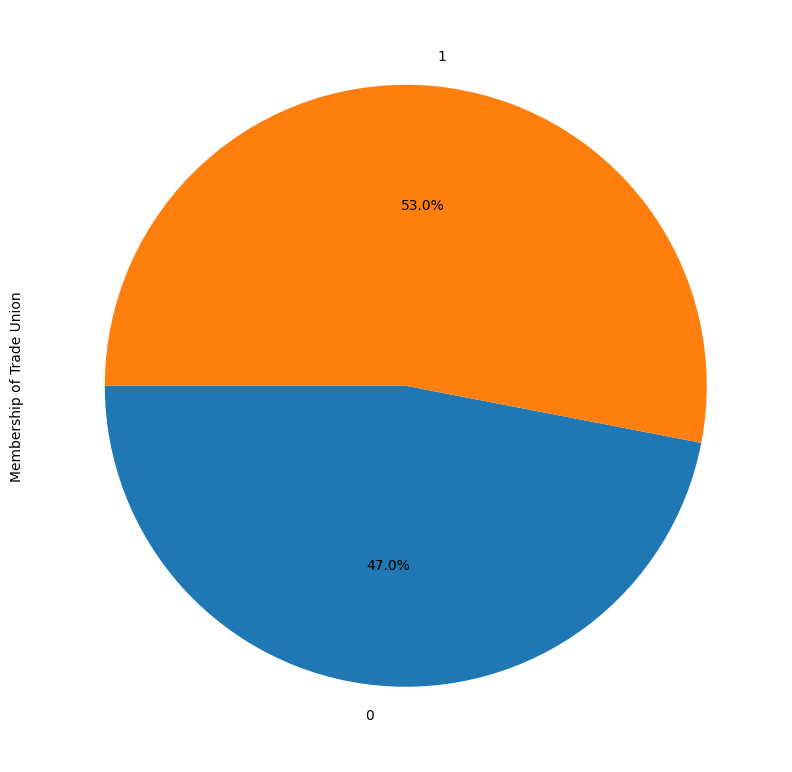

In [15]:

plt.figure(figsize=(8, 8)) 
mbtru_pie_count.plot(kind='pie', autopct='%1.1f%%', startangle=180, legend=False)
plt.ylabel('Membership of Trade Union') 
plt.tight_layout()  
plt.show()

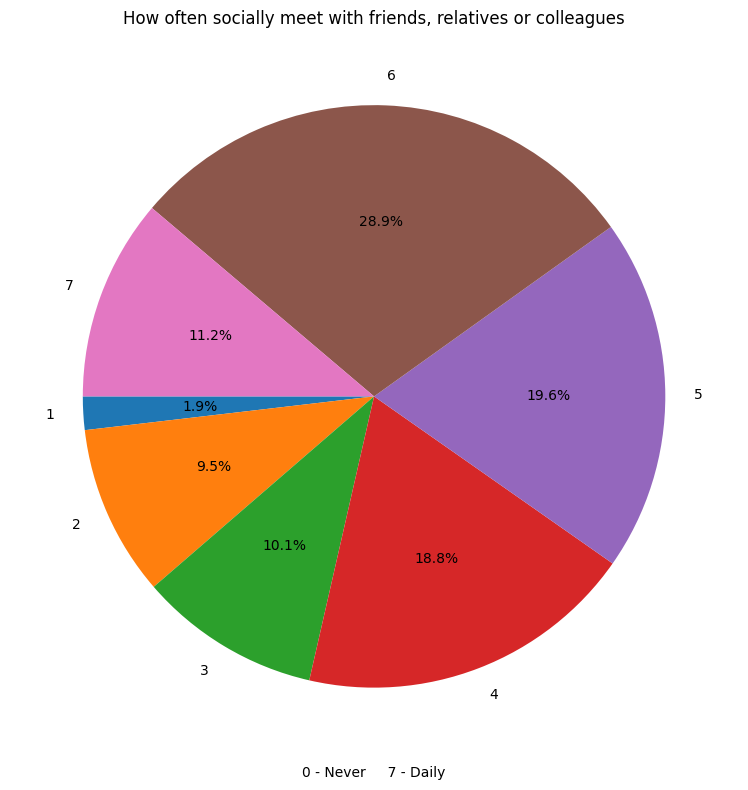

In [16]:
sclmeet_pie_name = cleaned_twice_df.groupby("sclmeet")
sclmeet_pie_count = sclmeet_pie_name["sclmeet"].count()


plt.figure(figsize=(8, 8)) 


plt.title("How often socially meet with friends, relatives or colleagues")


sclmeet_pie_count.plot(kind='pie', autopct='%1.1f%%', startangle=180, legend=False)


plt.ylabel('') 
plt.xlabel('0 - Never     7 - Daily') 


plt.tight_layout()  
plt.savefig("sociability.png", format='png', dpi=300, transparent=False)

#
plt.show()

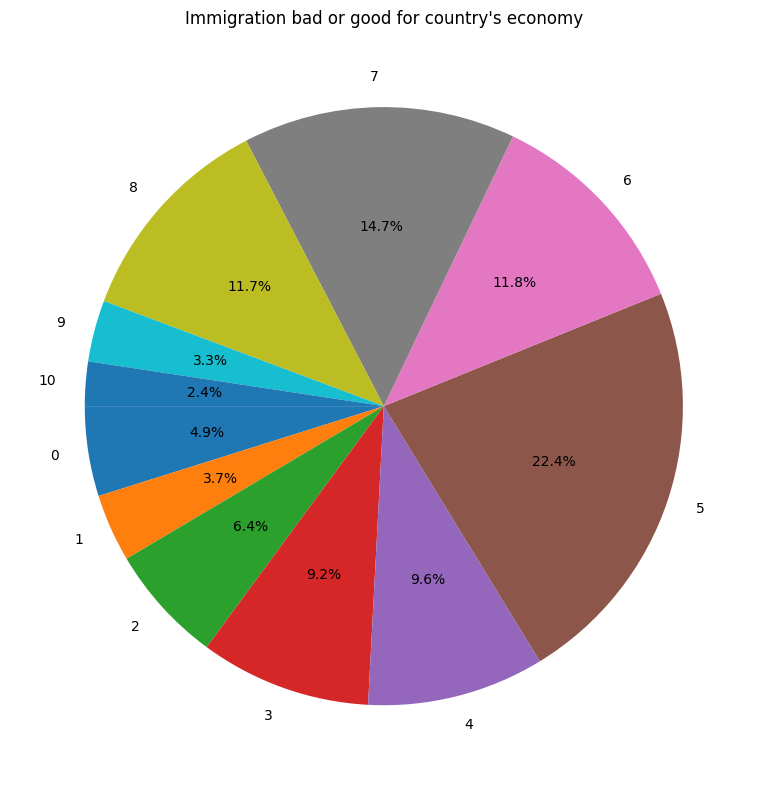

In [21]:


imbgeco_pie_name = cleaned_twice_df.groupby("imbgeco")
imbgeco_pie_count = imbgeco_pie_name["imbgeco"].count()

plt.figure(figsize=(8, 8))
pie = imbgeco_pie_count.plot(kind='pie', autopct='%1.1f%%', startangle=180, legend=False)

plt.ylabel('')
# Set the title
plt.title("Immigration bad or good for country's economy")


plt.tight_layout()
plt.savefig("Immigrant.png", format='png', dpi=300, transparent=False)
plt.show()


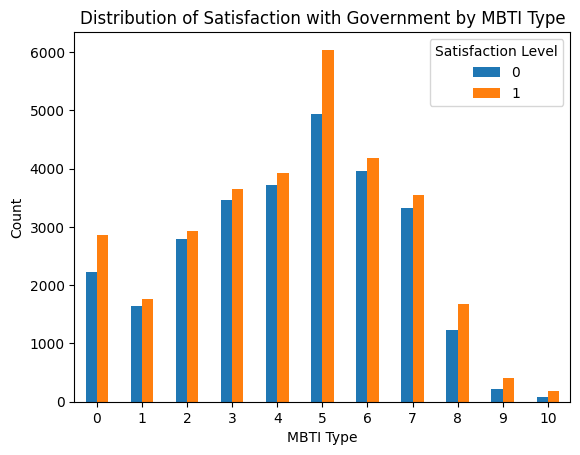

In [23]:
grouped_data = cleaned_twice_df.groupby(['trstplt', 'union membership']).size().unstack(fill_value=0)


fig, ax = plt.subplots()
grouped_data.plot(kind='bar', ax=ax)

ax.set_xlabel('MBTI Type')
ax.set_ylabel('Count')
ax.set_title('Distribution of Satisfaction with Government by MBTI Type')
plt.xticks(rotation=0)
plt.legend(title='Satisfaction Level')
plt.show()


In [24]:
# Assume 'politician_cnty_df' has a column 'cntry' that contains country names

cleaned_twice_df.loc[:, 'cntry'] = cleaned_twice_df['cntry'].replace({
    'FI': 'Finland',
    'GB': 'United Kingdom',
    'HU': 'Hungary',
    'CH': 'Switzerland'
})

# Now groupby and manipulate data
politician_cnty_df = (cleaned_twice_df
    .groupby('cntry')['trstplt']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .unstack(fill_value=0))

politician_cnty_df

trstplt,0,1,2,3,4,5,6,7,8,9,10
cntry,,,,,,,,,,,
Finland,3.44,4.06,7.33,10.51,13.13,18.22,18.49,17.58,6.06,1.06,0.13
Hungary,17.52,9.48,13.70,13.33,10.58,15.40,7.84,6.20,3.80,1.14,1.01
Switzerland,2.57,1.78,5.36,9.45,12.78,23.92,18.53,15.78,7.60,1.59,0.65
United Kingdom,12.70,8.13,12.91,14.92,14.74,17.38,9.58,6.34,2.49,0.55,0.27


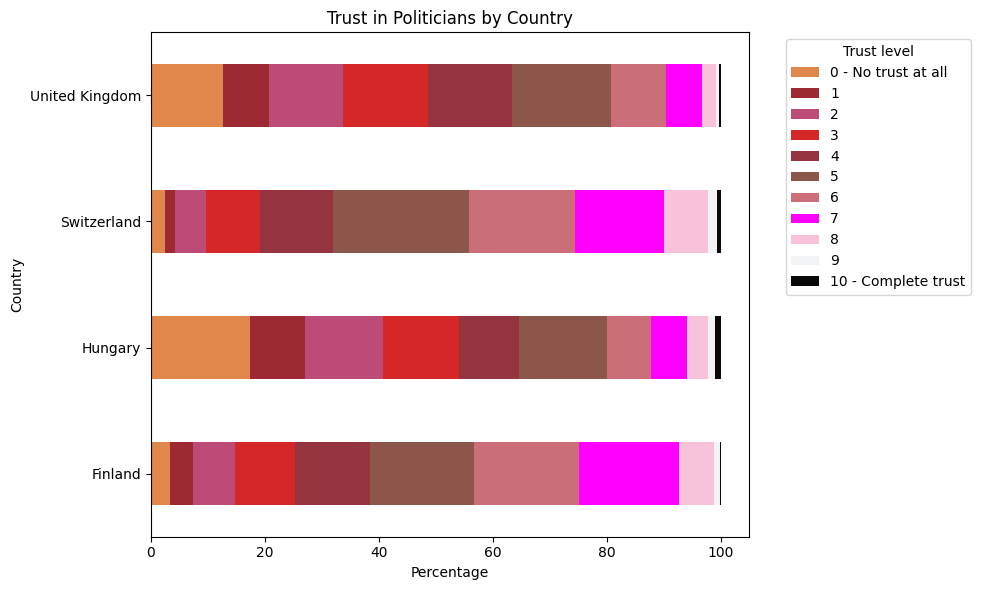

In [25]:

custom_colors = ['#e0884b', '#9d2933', '#bc4c77', '#d62728', '#95343e', '#8c564b', '#cc6e78', '#ff00ff', '#f8c3da', '#f2f3f4', '#080808']
politician_cnty_df.columns = [f'{col} - No trust at all' if col == 0 else f'{col} - Complete trust' if col == 10 else str(col) for col in politician_cnty_df.columns]
ax = politician_cnty_df.plot(kind='barh', stacked=True, figsize=(10, 6), color=custom_colors)
ax.legend(title='Trust level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Percentage')
plt.ylabel('Country')
plt.title('Trust in Politicians by Country')

plt.tight_layout()
plt.savefig('Trust_in_Politicians.png', format='png', dpi=300, transparent=False)


plt.show()



In [26]:
legal_cnty_df = (cleaned_twice_df
    .groupby('cntry')['trstlgl']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .unstack(fill_value=0))

legal_cnty_df

trstlgl,0,1,2,3,4,5,6,7,8,9,10
cntry,,,,,,,,,,,
Finland,0.71,1.03,1.88,3.34,4.96,8.18,9.28,17.92,27.64,20.96,4.10
Hungary,6.99,4.42,8.23,11.41,10.18,17.72,12.08,11.99,10.30,3.62,3.06
Switzerland,1.47,0.93,2.30,4.88,6.90,14.09,12.63,19.90,22.69,9.95,4.27
United Kingdom,4.53,2.82,5.98,8.82,10.61,16.37,12.79,16.86,14.45,4.93,1.84


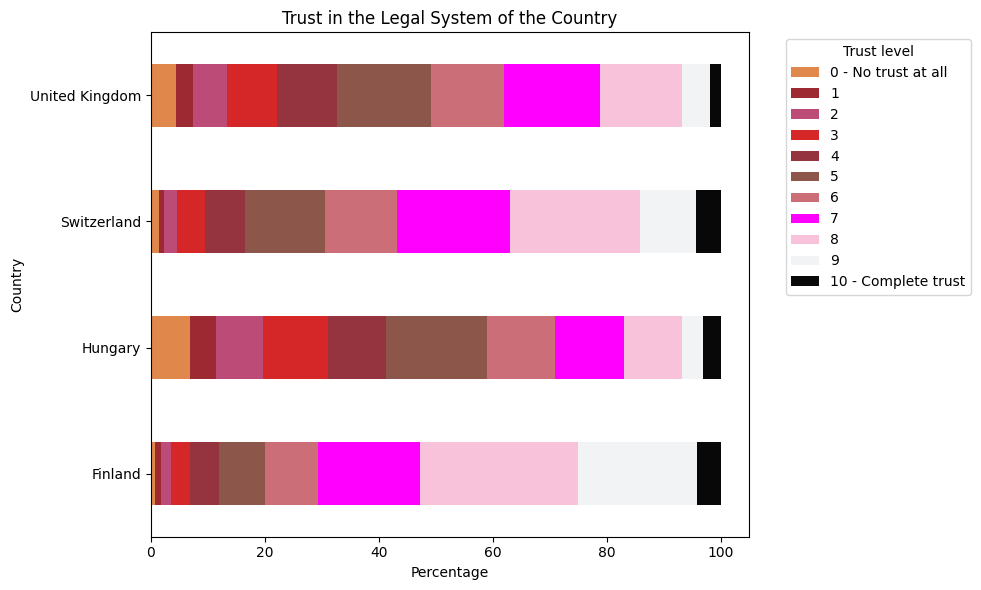

In [27]:

custom_colors = ['#e0884b', '#9d2933', '#bc4c77', '#d62728', '#95343e', '#8c564b', '#cc6e78', '#ff00ff', '#f8c3da', '#f2f3f4', '#080808']
legal_cnty_df.columns = [f'{col} - No trust at all' if col == 0 else f'{col} - Complete trust' if col == 10 else str(col) for col in politician_cnty_df.columns]

ax = legal_cnty_df.plot(kind='barh', stacked=True, figsize=(10, 6), color=custom_colors)

ax.legend(title='Trust level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Percentage')
plt.ylabel('Country')
plt.title('Trust in the Legal System of the Country')

plt.tight_layout()
plt.savefig('Trust_in_Legal Sytem.png', format='png', dpi=300, transparent=False)


plt.show()



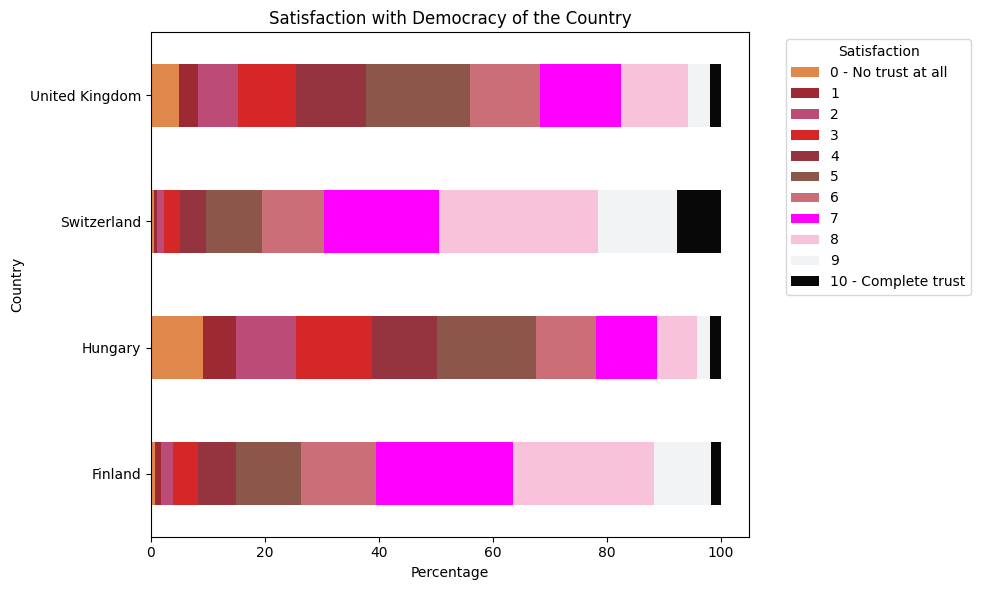

In [28]:
St_dem_cnty_df = (cleaned_twice_df
    .groupby('cntry')['stfdem']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .unstack(fill_value=0))

custom_colors = ['#e0884b', '#9d2933', '#bc4c77', '#d62728', '#95343e', '#8c564b', '#cc6e78', '#ff00ff', '#f8c3da', '#f2f3f4', '#080808']
St_dem_cnty_df.columns = [f'{col} - No trust at all' if col == 0 else f'{col} - Complete trust' if col == 10 else str(col) for col in politician_cnty_df.columns]

ax = St_dem_cnty_df.plot(kind='barh', stacked=True, figsize=(10, 6), color=custom_colors)

ax.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Percentage')
plt.ylabel('Country')
plt.title('Satisfaction with Democracy of the Country')

plt.tight_layout()
plt.savefig('Satisfaction with Democracy.png', format='png', dpi=300, transparent=False)


plt.show()

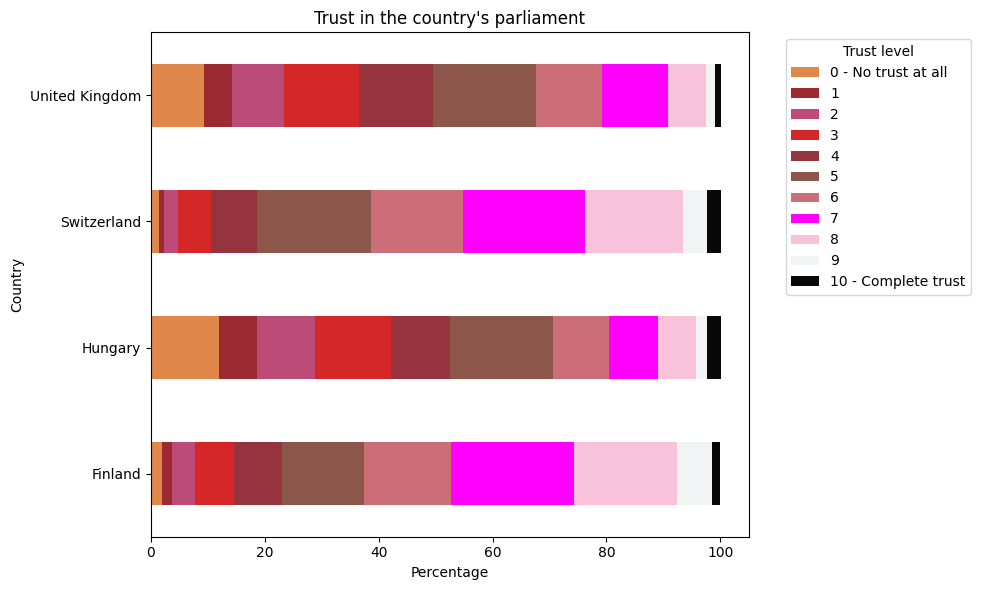

In [29]:
trstprl_cnty_df = (cleaned_twice_df
    .groupby('cntry')['trstprl']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .unstack(fill_value=0))

custom_colors = ['#e0884b', '#9d2933', '#bc4c77', '#d62728', '#95343e', '#8c564b', '#cc6e78', '#ff00ff', '#f8c3da', '#f2f3f4', '#080808']
trstprl_cnty_df.columns = [f'{col} - No trust at all' if col == 0 else f'{col} - Complete trust' if col == 10 else str(col) for col in politician_cnty_df.columns]

ax = trstprl_cnty_df.plot(kind='barh', stacked=True, figsize=(10, 6), color=custom_colors)

ax.legend(title='Trust level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Percentage')
plt.ylabel('Country')
plt.title("Trust in the country's parliament")

plt.tight_layout()
plt.savefig("Trust in the country's parliament.png", format='png', dpi=300, transparent=False)


plt.show()

In [30]:
country_dfs = {cntry: group for cntry, group in cleaned_twice_df.groupby('cntry')}

# Example: Access the DataFrame for a specific country, e.g., 'USA'
swiss_df = country_dfs.get('Switzerland')
fin_df = country_dfs.get('Finland')
gb_df = country_dfs.get('United Kingdom')
hu_df = country_dfs.get('Hungary')


hu_df_clean = hu_df.drop(['cntry'], axis=1)
hu_df_corr = hu_df_clean.corr(method='pearson')
hu_df_corr.to_csv("HU_corr.csv")


ValueError: could not convert string to float: 'ESS1e06_7'

In [31]:
hu_df_clean

,name,essround,edition,proddate,idno,dweight,pspwght,pweight,stfdem,stfeco,...,trstplc,trstplt,trstprl,imbgeco,dscrgrp,sclmeet,mbtru,iplylfr,ipudrst,union membership
6092,ESS1e06_7,1,6.7,23.11.2023,2,1.000000,1.156497,0.479563,6,5,...,5,6,7,5,2,3,2,3.0,3.0,0
6093,ESS1e06_7,1,6.7,23.11.2023,3,1.000000,1.011243,0.479563,6,4,...,3,4,8,3,2,4,2,1.0,1.0,0
6094,ESS1e06_7,1,6.7,23.11.2023,4,1.000000,1.268207,0.479563,6,6,...,5,5,5,3,2,6,3,3.0,4.0,1
6095,ESS1e06_7,1,6.7,23.11.2023,5,1.000000,1.048911,0.479563,0,2,...,1,0,4,8,1,6,3,2.0,3.0,1
6096,ESS1e06_7,1,6.7,23.11.2023,6,1.000000,1.234157,0.479563,5,4,...,4,2,3,0,2,7,3,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74071,ESS10e03_2,10,3.2,02.11.2023,27897,1.214404,0.672999,0.449624,4,3,...,5,0,2,2,2,4,2,2.0,2.0,0
74072,ESS10e03_2,10,3.2,02.11.2023,27901,0.770348,1.245779,0.449624,9,8,...,10,10,10,3,2,4,2,1.0,2.0,0
74074,ESS10e03_2,10,3.2,02.11.2023,27905,0.778477,1.274237,0.449624,0,2,...,4,0,2,3,2,3,3,2.0,2.0,1
74076,ESS10e03_2,10,3.2,02.11.2023,27921,0.778477,0.751644,0.449624,1,2,...,3,3,0,5,2,2,2,1.0,2.0,0


In [32]:

lower_hu_trstlgl = hu_df_clean[hu_df_clean['trstlgl'] < 5]
bigger_hu_trstlgl = hu_df_clean[hu_df_clean['trstlgl'] >= 5]

lower_hu_stfdem = hu_df_clean[hu_df_clean['stfdem'] < 5]
bigger_hu_stfdem = hu_df_clean[hu_df_clean['stfdem'] >= 5]

lower_hu_trstplt = hu_df_clean[hu_df_clean['trstplt'] < 5]
bigger_hu_trstplt = hu_df_clean[hu_df_clean['trstplt'] >= 5]

lower_hu_trstprl = hu_df_clean[hu_df_clean['trstprl'] < 5]
bigger_hu_trstprl = hu_df_clean[hu_df_clean['trstprl'] >= 5]

# Linear regression for trstlgl
hu_lgl_bx = bigger_hu_trstlgl['imbgeco'].values
hu_lgl_by = bigger_hu_trstlgl['trstlgl'].values

hu_lgl_lx = lower_hu_trstlgl['imbgeco'].values
hu_lgl_ly = lower_hu_trstlgl['trstlgl'].values

slo_hu_lglbig, in_hu_lglbig, r_hu_lglbig, p_hu_lglbig, std_hu_lglbig = linregress(hu_lgl_bx, hu_lgl_by)
slo_hu_lgllow, in_hu_lgllow, r_hu_lgllow, p_hu_lgllow, std_hu_lgllow = linregress(hu_lgl_lx, hu_lgl_ly)

print(f"the upper trstlgl R-squared: {round(r_hu_lglbig**2, 3)}")
print(f"the lower trstlgl R-squared: {round(r_hu_lgllow**2, 3)}")

# Linear regression for stfdem
hu_stfdem_bx = bigger_hu_stfdem['imbgeco'].values
hu_stfdem_by = bigger_hu_stfdem['stfdem'].values

hu_stfdem_lx = lower_hu_stfdem['imbgeco'].values
hu_stfdem_ly = lower_hu_stfdem['stfdem'].values

slo_hu_stfdembig, in_hu_stfdembig, r_hu_stfdembig, p_hu_stfdembig, std_hu_stfdembig = linregress(hu_stfdem_bx, hu_stfdem_by)
slo_hu_stfdemlow, in_hu_stfdemlow, r_hu_stfdemlow, p_hu_stfdemlow, std_hu_stfdemlow = linregress(hu_stfdem_lx, hu_stfdem_ly)

print(f"the upper stfdem R-squared: {round(r_hu_stfdembig**2, 4)}")
print(f"the lower stfdem R-squared: {round(r_hu_stfdemlow**2, 4)}")

# Linear regression for trstplt
hu_trstplt_bx = bigger_hu_trstplt['imbgeco'].values
hu_trstplt_by = bigger_hu_trstplt['trstplt'].values

hu_trstplt_lx = lower_hu_trstplt['imbgeco'].values
hu_trstplt_ly = lower_hu_trstplt['trstplt'].values

slo_hu_trstpltbig, in_hu_trstpltbig, r_hu_trstpltbig, p_hu_trstpltbig, std_hu_trstpltbig = linregress(hu_trstplt_bx, hu_trstplt_by)
slo_hu_trstpltlow, in_hu_trstpltlow, r_hu_trstpltlow, p_hu_trstpltlow, std_hu_trstpltlow = linregress(hu_trstplt_lx, hu_trstplt_ly)

print(f"the upper trstplt R-squared: {round(r_hu_trstpltbig**2, 3)}")
print(f"the lower trstplt R-squared: {round(r_hu_trstpltlow**2, 3)}")

# Linear regression for trstprl
hu_trstprl_bx = bigger_hu_trstprl['imbgeco'].values
hu_trstprl_by = bigger_hu_trstprl['trstprl'].values

hu_trstprl_lx = lower_hu_trstprl['imbgeco'].values
hu_trstprl_ly = lower_hu_trstprl['trstprl'].values

slo_hu_trstprlbig, in_hu_trstprlbig, r_hu_trstprlbig, p_hu_trstprlbig, std_hu_trstprlbig = linregress(hu_trstprl_bx, hu_trstprl_by)
slo_hu_trstprllow, in_hu_trstprllow, r_hu_trstprllow, p_hu_trstprllow, std_hu_trstprllow = linregress(hu_trstprl_lx, hu_trstprl_ly)

print(f"the upper trstprl R-squared: {round(r_hu_trstprlbig**2, 3)}")
print(f"the lower trstprl R-squared: {round(r_hu_trstprllow**2, 3)}")


the upper trstlgl R-squared: 0.001
the lower trstlgl R-squared: 0.024
the upper stfdem R-squared: 0.0017
the lower stfdem R-squared: 0.0203
the upper trstplt R-squared: 0.0
the lower trstplt R-squared: 0.025
the upper trstprl R-squared: 0.001
the lower trstprl R-squared: 0.02


In [37]:
gb_df_clean = gb_df

# Filter dataframes based on different columns
lower_gb_trstlgl = gb_df_clean[gb_df_clean['trstlgl'] < 5]
bigger_gb_trstlgl = gb_df_clean[gb_df_clean['trstlgl'] >= 5]

lower_gb_stfdem = gb_df_clean[gb_df_clean['stfdem'] < 5]
bigger_gb_stfdem = gb_df_clean[gb_df_clean['stfdem'] >= 5]

lower_gb_trstplt = gb_df_clean[gb_df_clean['trstplt'] < 5]
bigger_gb_trstplt = gb_df_clean[gb_df_clean['trstplt'] >= 5]

lower_gb_trstprl = gb_df_clean[gb_df_clean['trstprl'] < 5]
bigger_gb_trstprl = gb_df_clean[gb_df_clean['trstprl'] >= 5]

# Linear regression for trstlgl
gb_lgl_bx = bigger_gb_trstlgl['imbgeco'].values
gb_lgl_by = bigger_gb_trstlgl['trstlgl'].values

gb_lgl_lx = lower_gb_trstlgl['imbgeco'].values
gb_lgl_ly = lower_gb_trstlgl['trstlgl'].values

slo_gb_lglbig, in_gb_lglbig, r_gb_lglbig, p_gb_lglbig, std_gb_lglbig = linregress(gb_lgl_bx, gb_lgl_by)
slo_gb_lgllow, in_gb_lgllow, r_gb_lgllow, p_gb_lgllow, std_gb_lgllow = linregress(gb_lgl_lx, gb_lgl_ly)

print(f"the upper trstlgl R-squared: {round(r_gb_lglbig**2, 3)}")
print(f"the lower trstlgl R-squared: {round(r_gb_lgllow**2, 3)}")

# Linear regression for stfdem
gb_stfdem_bx = bigger_gb_stfdem['imbgeco'].values
gb_stfdem_by = bigger_gb_stfdem['stfdem'].values

gb_stfdem_lx = lower_gb_stfdem['imbgeco'].values
gb_stfdem_ly = lower_gb_stfdem['stfdem'].values

slo_gb_stfdembig, in_gb_stfdembig, r_gb_stfdembig, p_gb_stfdembig, std_gb_stfdembig = linregress(gb_stfdem_bx, gb_stfdem_by)
slo_gb_stfdemlow, in_gb_stfdemlow, r_gb_stfdemlow, p_gb_stfdemlow, std_gb_stfdemlow = linregress(gb_stfdem_lx, gb_stfdem_ly)

print(f"the upper stfdem R-squared: {round(r_gb_stfdembig**2, 3)}")
print(f"the lower stfdem R-squared: {round(r_gb_stfdemlow**2, 3)}")

# Linear regression for trstplt
gb_trstplt_bx = bigger_gb_trstplt['imbgeco'].values
gb_trstplt_by = bigger_gb_trstplt['trstplt'].values

gb_trstplt_lx = lower_gb_trstplt['imbgeco'].values
gb_trstplt_ly = lower_gb_trstplt['trstplt'].values

slo_gb_trstpltbig, in_gb_trstpltbig, r_gb_trstpltbig, p_gb_trstpltbig, std_gb_trstpltbig = linregress(gb_trstplt_bx, gb_trstplt_by)
slo_gb_trstpltlow, in_gb_trstpltlow, r_gb_trstpltlow, p_gb_trstpltlow, std_gb_trstpltlow = linregress(gb_trstplt_lx, gb_trstplt_ly)

print(f"the upper trstplt R-squared: {round(r_gb_trstpltbig**2, 3)}")
print(f"the lower trstplt R-squared: {round(r_gb_trstpltlow**2, 3)}")

# Linear regression for trstprl
gb_trstprl_bx = bigger_gb_trstprl['imbgeco'].values
gb_trstprl_by = bigger_gb_trstprl['trstprl'].values

gb_trstprl_lx = lower_gb_trstprl['imbgeco'].values
gb_trstprl_ly = lower_gb_trstprl['trstprl'].values

slo_gb_trstprlbig, in_gb_trstprlbig, r_gb_trstprlbig, p_gb_trstprlbig, std_gb_trstprlbig = linregress(gb_trstprl_bx, gb_trstprl_by)
slo_gb_trstprllow, in_gb_trstprllow, r_gb_trstprllow, p_gb_trstprllow, std_gb_trstprllow = linregress(gb_trstprl_lx, gb_trstprl_ly)

print(f"the upper trstprl R-squared: {round(r_gb_trstprlbig**2, 3)}")
print(f"the lower trstprl R-squared: {round(r_gb_trstprllow**2, 3)}")


the upper trstlgl R-squared: 0.039
the lower trstlgl R-squared: 0.031
the upper stfdem R-squared: 0.048
the lower stfdem R-squared: 0.025
the upper trstplt R-squared: 0.014
the lower trstplt R-squared: 0.037
the upper trstprl R-squared: 0.036
the lower trstprl R-squared: 0.031


In [38]:

fin_df_clean = fin_df

# Filter dataframes based on different columns
lower_fin_trstlgl = fin_df_clean[fin_df_clean['trstlgl'] < 5]
bigger_fin_trstlgl = fin_df_clean[fin_df_clean['trstlgl'] >= 5]

lower_fin_stfdem = fin_df_clean[fin_df_clean['stfdem'] < 5]
bigger_fin_stfdem = fin_df_clean[fin_df_clean['stfdem'] >= 5]

lower_fin_trstplt = fin_df_clean[fin_df_clean['trstplt'] < 5]
bigger_fin_trstplt = fin_df_clean[fin_df_clean['trstplt'] >= 5]

lower_fin_trstprl = fin_df_clean[fin_df_clean['trstprl'] < 5]
bigger_fin_trstprl = fin_df_clean[fin_df_clean['trstprl'] >= 5]

# Linear regression for trstlgl
fin_lgl_bx = bigger_fin_trstlgl['imbgeco'].values
fin_lgl_by = bigger_fin_trstlgl['trstlgl'].values

fin_lgl_lx = lower_fin_trstlgl['imbgeco'].values
fin_lgl_ly = lower_fin_trstlgl['trstlgl'].values

slo_fin_lglbig, in_fin_lglbig, r_fin_lglbig, p_fin_lglbig, std_fin_lglbig = linregress(fin_lgl_bx, fin_lgl_by)
slo_fin_lgllow, in_fin_lgllow, r_fin_lgllow, p_fin_lgllow, std_fin_lgllow = linregress(fin_lgl_lx, fin_lgl_ly)

print(f"the upper trstlgl R-squared: {round(r_fin_lglbig**2, 3)}")
print(f"the lower trstlgl R-squared: {round(r_fin_lgllow**2, 3)}")

# Linear regression for stfdem
fin_stfdem_bx = bigger_fin_stfdem['imbgeco'].values
fin_stfdem_by = bigger_fin_stfdem['stfdem'].values

fin_stfdem_lx = lower_fin_stfdem['imbgeco'].values
fin_stfdem_ly = lower_fin_stfdem['stfdem'].values

slo_fin_stfdembig, in_fin_stfdembig, r_fin_stfdembig, p_fin_stfdembig, std_fin_stfdembig = linregress(fin_stfdem_bx, fin_stfdem_by)
slo_fin_stfdemlow, in_fin_stfdemlow, r_fin_stfdemlow, p_fin_stfdemlow, std_fin_stfdemlow = linregress(fin_stfdem_lx, fin_stfdem_ly)

print(f"the upper stfdem R-squared: {round(r_fin_stfdembig**2, 3)}")
print(f"the lower stfdem R-squared: {round(r_fin_stfdemlow**2, 3)}")

# Linear regression for trstplt
fin_trstplt_bx = bigger_fin_trstplt['imbgeco'].values
fin_trstplt_by = bigger_fin_trstplt['trstplt'].values

fin_trstplt_lx = lower_fin_trstplt['imbgeco'].values
fin_trstplt_ly = lower_fin_trstplt['trstplt'].values

slo_fin_trstpltbig, in_fin_trstpltbig, r_fin_trstpltbig, p_fin_trstpltbig, std_fin_trstpltbig = linregress(fin_trstplt_bx, fin_trstplt_by)
slo_fin_trstpltlow, in_fin_trstpltlow, r_fin_trstpltlow, p_fin_trstpltlow, std_fin_trstpltlow = linregress(fin_trstplt_lx, fin_trstplt_ly)

print(f"the upper trstplt R-squared: {round(r_fin_trstpltbig**2, 3)}")
print(f"the lower trstplt R-squared: {round(r_fin_trstpltlow**2, 3)}")

# Linear regression for trstprl
fin_trstprl_bx = bigger_fin_trstprl['imbgeco'].values
fin_trstprl_by = bigger_fin_trstprl['trstprl'].values

fin_trstprl_lx = lower_fin_trstprl['imbgeco'].values
fin_trstprl_ly = lower_fin_trstprl['trstprl'].values

slo_fin_trstprlbig, in_fin_trstprlbig, r_fin_trstprlbig, p_fin_trstprlbig, std_fin_trstprlbig = linregress(fin_trstprl_bx, fin_trstprl_by)
slo_fin_trstprllow, in_fin_trstprllow, r_fin_trstprllow, p_fin_trstprllow, std_fin_trstprllow = linregress(fin_trstprl_lx, fin_trstprl_ly)

print(f"the upper trstprl R-squared: {round(r_fin_trstprlbig**2, 3)}")
print(f"the lower trstprl R-squared: {round(r_fin_trstprllow**2, 3)}")


the upper trstlgl R-squared: 0.054
the lower trstlgl R-squared: 0.019
the upper stfdem R-squared: 0.06
the lower stfdem R-squared: 0.016
the upper trstplt R-squared: 0.02
the lower trstplt R-squared: 0.048
the upper trstprl R-squared: 0.048
the lower trstprl R-squared: 0.039


In [39]:
swiss_df_clean = swiss_df

lower_swiss_trstlgl = swiss_df_clean[swiss_df_clean['trstlgl'] < 5]
bigger_swiss_trstlgl = swiss_df_clean[swiss_df_clean['trstlgl'] >= 5]

lower_swiss_stfdem = swiss_df_clean[swiss_df_clean['stfdem'] < 5]
bigger_swiss_stfdem = swiss_df_clean[swiss_df_clean['stfdem'] >= 5]

lower_swiss_trstplt = swiss_df_clean[swiss_df_clean['trstplt'] < 5]
bigger_swiss_trstplt = swiss_df_clean[swiss_df_clean['trstplt'] >= 5]

lower_swiss_trstprl = swiss_df_clean[swiss_df_clean['trstprl'] < 5]
bigger_swiss_trstprl = swiss_df_clean[swiss_df_clean['trstprl'] >= 5]

#  trstlgl
swiss_lgl_bx = bigger_swiss_trstlgl['imbgeco'].values
swiss_lgl_by = bigger_swiss_trstlgl['trstlgl'].values

swiss_lgl_lx = lower_swiss_trstlgl['imbgeco'].values
swiss_lgl_ly = lower_swiss_trstlgl['trstlgl'].values

slo_swiss_lglbig, in_swiss_lglbig, r_swiss_lglbig, p_swiss_lglbig, std_swiss_lglbig = linregress(swiss_lgl_bx, swiss_lgl_by)
slo_swiss_lgllow, in_swiss_lgllow, r_swiss_lgllow, p_swiss_lgllow, std_swiss_lgllow = linregress(swiss_lgl_lx, swiss_lgl_ly)

print(f"the upper trstlgl R-squared: {round(r_swiss_lglbig**2, 3)}")
print(f"the lower trstlgl R-squared: {round(r_swiss_lgllow**2, 3)}")

#  stfdem
swiss_stfdem_bx = bigger_swiss_stfdem['imbgeco'].values
swiss_stfdem_by = bigger_swiss_stfdem['stfdem'].values

swiss_stfdem_lx = lower_swiss_stfdem['imbgeco'].values
swiss_stfdem_ly = lower_swiss_stfdem['stfdem'].values

slo_swiss_stfdembig, in_swiss_stfdembig, r_swiss_stfdembig, p_swiss_stfdembig, std_swiss_stfdembig = linregress(swiss_stfdem_bx, swiss_stfdem_by)
slo_swiss_stfdemlow, in_swiss_stfdemlow, r_swiss_stfdemlow, p_swiss_stfdemlow, std_swiss_stfdemlow = linregress(swiss_stfdem_lx, swiss_stfdem_ly)

print(f"the upper stfdem R-squared: {round(r_swiss_stfdembig**2, 3)}")
print(f"the lower stfdem R-squared: {round(r_swiss_stfdemlow**2, 3)}")

#trstplt
swiss_trstplt_bx = bigger_swiss_trstplt['imbgeco'].values
swiss_trstplt_by = bigger_swiss_trstplt['trstplt'].values

swiss_trstplt_lx = lower_swiss_trstplt['imbgeco'].values
swiss_trstplt_ly = lower_swiss_trstplt['trstplt'].values

slo_swiss_trstpltbig, in_swiss_trstpltbig, r_swiss_trstpltbig, p_swiss_trstpltbig, std_swiss_trstpltbig = linregress(swiss_trstplt_bx, swiss_trstplt_by)
slo_swiss_trstpltlow, in_swiss_trstpltlow, r_swiss_trstpltlow, p_swiss_trstpltlow, std_swiss_trstpltlow = linregress(swiss_trstplt_lx, swiss_trstplt_ly)

print(f"the upper trstplt R-squared: {round(r_swiss_trstpltbig**2, 3)}")
print(f"the lower trstplt R-squared: {round(r_swiss_trstpltlow**2, 3)}")

# trstprl
swiss_trstprl_bx = bigger_swiss_trstprl['imbgeco'].values
swiss_trstprl_by = bigger_swiss_trstprl['trstprl'].values

swiss_trstprl_lx = lower_swiss_trstprl['imbgeco'].values
swiss_trstprl_ly = lower_swiss_trstprl['trstprl'].values

slo_swiss_trstprlbig, in_swiss_trstprlbig, r_swiss_trstprlbig, p_swiss_trstprlbig, std_swiss_trstprlbig = linregress(swiss_trstprl_bx, swiss_trstprl_by)
slo_swiss_trstprllow, in_swiss_trstprllow, r_swiss_trstprllow, p_swiss_trstprllow, std_swiss_trstprllow = linregress(swiss_trstprl_lx, swiss_trstprl_ly)

print(f"the upper trstprl R-squared: {round(r_swiss_trstprlbig**2, 3)}")
print(f"the lower trstprl R-squared: {round(r_swiss_trstprllow**2, 3)}")


the upper trstlgl R-squared: 0.039
the lower trstlgl R-squared: 0.012
the upper stfdem R-squared: 0.037
the lower stfdem R-squared: 0.013
the upper trstplt R-squared: 0.006
the lower trstplt R-squared: 0.009
the upper trstprl R-squared: 0.028
the lower trstprl R-squared: 0.024


In [40]:

cleaned_dfs = {
    'Switzerland': swiss_df_clean,
    'Finland': fin_df_clean,
    'United Kingdom': gb_df_clean,
    'Hungary': hu_df_clean
}

# Define the columns of interest
columns = ['trstlgl', 'stfdem', 'trstplt', 'trstprl']


def process_country_data(country_name, df):
    results = {}
    for column in columns:
        lower_df = df[df[column] < 5]
        bigger_df = df[df[column] >= 5]
        
        lower_x = lower_df['sclmeet'].values
        lower_y = lower_df[column].values
        bigger_x = bigger_df['sclmeet'].values
        bigger_y = bigger_df[column].values

        slo_bigger, in_bigger, r_bigger, p_bigger, std_bigger = linregress(bigger_x, bigger_y)
        slo_lower, in_lower, r_lower, p_lower, std_lower = linregress(lower_x, lower_y)

        results[column] = {
            'r_squared_bigger': round(r_bigger**2, 3),
            'r_squared_lower': round(r_lower**2, 3)
        }
        
        print(f"{country_name} - {column}:")
        print(f"  Upper {column} R-squared: {round(r_bigger**2, 4)}")
        print(f"  Lower {column} R-squared: {round(r_lower**2, 4)}")
    return results


for country, clean_df in cleaned_dfs.items():
    process_country_data(country, clean_df)



Switzerland - trstlgl:
  Upper trstlgl R-squared: 0.0025
  Lower trstlgl R-squared: 0.0029
Switzerland - stfdem:
  Upper stfdem R-squared: 0.0004
  Lower stfdem R-squared: 0.0028
Switzerland - trstplt:
  Upper trstplt R-squared: 0.0003
  Lower trstplt R-squared: 0.0014
Switzerland - trstprl:
  Upper trstprl R-squared: 0.0018
  Lower trstprl R-squared: 0.0013
Finland - trstlgl:
  Upper trstlgl R-squared: 0.0005
  Lower trstlgl R-squared: 0.0
Finland - stfdem:
  Upper stfdem R-squared: 0.0017
  Lower stfdem R-squared: 0.0
Finland - trstplt:
  Upper trstplt R-squared: 0.0028
  Lower trstplt R-squared: 0.0
Finland - trstprl:
  Upper trstprl R-squared: 0.0007
  Lower trstprl R-squared: 0.0
United Kingdom - trstlgl:
  Upper trstlgl R-squared: 0.001
  Lower trstlgl R-squared: 0.0003
United Kingdom - stfdem:
  Upper stfdem R-squared: 0.0001
  Lower stfdem R-squared: 0.0018
United Kingdom - trstplt:
  Upper trstplt R-squared: 0.0002
  Lower trstplt R-squared: 0.0028
United Kingdom - trstprl:
  